In [746]:
%matplotlib inline
import numpy as np
import pandas as pd
from cycler import cycler
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [747]:
original_data = pd.read_csv("piter_filtered.csv")
df = original_data
df.head(10)
df = df.drop(df[df['Kitchen']>50].index)
df = df.drop(df[df['Live area']>150].index)
df = df.drop(df[df['Total area']>249].index)
df = df.drop(df[df['Rooms']<1].index)
df = df.drop(df[df['Rooms']>5].index)
df = df.drop(df[df['Longitude']>31.4].index)
df = df.drop(df[df['Longitude']<29.2].index)
df = df.drop(df[df['Latitude']<59].index)
df = df.drop(df[df['Latitude']>60.25].index)
df = df.drop(df[df['Price']>30000].index)
df = df.drop(df[df['Price']<1000].index)
print(df)

       Latitude  Longitude             City                  Area  \
0     59.911448  30.308232  Санкт-Петербург  Адмиралтейский район   
1     59.939095  30.315868  Санкт-Петербург  Адмиралтейский район   
2     59.920230  30.283214  Санкт-Петербург  Адмиралтейский район   
3     59.917231  30.284741  Санкт-Петербург  Адмиралтейский район   
4     59.919545  30.280834  Санкт-Петербург  Адмиралтейский район   
...         ...        ...              ...                   ...   
6190  59.938784  30.323126  Санкт-Петербург     Центральный район   
6191  59.937157  30.361449  Санкт-Петербург     Центральный район   
6192  59.935538  30.322677  Санкт-Петербург     Центральный район   
6193  59.936305  30.353040  Санкт-Петербург     Центральный район   
6194  59.926278  30.366839  Санкт-Петербург     Центральный район   

                       Address  Rooms Floor/Total floors Material  Total area  \
0          Измайловский пр. 16      1                4/7       СФ        28.8   
1     Гри

In [748]:
def get_one_hot(df, cols):
  df = pd.get_dummies(data = df, columns = cols)
  print ("\nOne_hot for : {} done.".format(cols))

  return df

In [749]:
def prepare_data(df):
  df.drop(['City', 'Floor/Total floors', 'Link', 'Comment', 'Seller', 'Address'], axis = 1, inplace = True)#'Material' 'Address','Seller',
  y = df['Price']
  df.drop('Price', axis = 1, inplace = True)

  return df, y

In [750]:
# y = data['Price']
# s=pd.Series(data['Material'])
# Material=pd.get_dummies(s)
# s1=pd.Series(data['Toilet type'])
# ToiletType=pd.get_dummies(s1)

# df = pd.DataFrame({'Live area': data['Live area'], 'Kitchen': data['Kitchen'], 'Total area': data['Total area'], 'Rooms': data['Rooms'], 'Longitude': data['Longitude'], 'Latitude': data['Latitude'] })
# df.join(ToiletType)
# df.join(Material)

# print(df.head(50))

In [751]:
cols = ['Material', 'Area', 'Toilet type']
df = get_one_hot(df, cols)
df, y = prepare_data(df)

print(df)


One_hot for : ['Material', 'Area', 'Toilet type'] done.
       Latitude  Longitude  Rooms  Total area  Live area  Kitchen  \
0     59.911448  30.308232      1        28.8       19.3      3.0   
1     59.939095  30.315868      1        27.0       18.5      4.0   
2     59.920230  30.283214      1        42.0       26.0      9.0   
3     59.917231  30.284741      1        31.0       16.9      9.0   
4     59.919545  30.280834      1        29.3       16.7      5.0   
...         ...        ...    ...         ...        ...      ...   
6190  59.938784  30.323126      5       205.0      140.0     17.8   
6191  59.937157  30.361449      5       193.2       91.0      0.0   
6192  59.935538  30.322677      5       180.4      137.0     10.2   
6193  59.936305  30.353040      5       170.0       72.0     40.0   
6194  59.926278  30.366839      5       181.0      100.0     19.0   

      Material_1.090.1  Material_121  Material_137  Material_504  ...  \
0                    0             0     

In [752]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print(f'R2 score: {r2_score(model.predict(X_test), y_test)}')
print(f'Mean error: {mean_squared_error(model.predict(X_test), y_test)}')

R2 score: 0.8093066886616551
Mean error: 2045825.2074724436


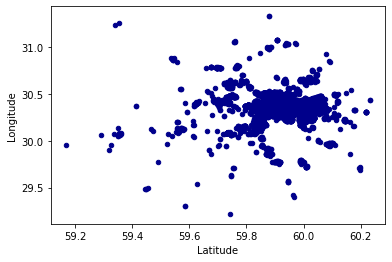

In [753]:
ax1 = df.plot.scatter(x='Latitude', y='Longitude', c='DarkBlue')

In [754]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 1204.25403544,   333.9580449 ,  -770.42303951,   118.08626682,
           3.50713623,    30.20942299,  -264.92370273,  -140.75376609,
         -93.76257206,    84.38049941,  -179.21750202,    12.42118073,
          95.86846404,    -0.        ,    96.2402992 ,   267.69411008,
        -220.60122511,   -96.26761425, -1036.63400096,   930.51155638,
         299.56038172,   205.76472312,    42.53989505,     0.        ,
        -345.08581801,  -219.03158189,   303.40976282,  2158.85754023,
          94.38149829,  -111.40205391,    -0.        ,   971.19527114,
       -1310.61449381,  -342.33431943,     0.        ,  1291.48869967,
        1555.96801097,   113.18917516,    -0.        ,   238.23739643,
        -981.0758294 ,  -220.08845873,  -335.98297297,  -617.57861003,
        -480.57977148,  1068.01948803,  -168.65422174, -1360.75983383,
        2368.44605838,  -477.07289843,   374.77093913,  -722.13796213,
         376.22767919,  2020.7190167 ,  1606.57151416,  2341.70224065,
      

In [755]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
lasso.coef_

array([  305.16433604,     0.        ,  -802.59312096,   122.64760945,
           2.62488703,    35.12327054,    -0.        ,    -0.        ,
          -0.        ,     0.        ,    -0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
          -0.        ,    -0.        ,    -0.        ,   377.14808972,
         192.21688944,   202.0249796 ,     0.        ,    -0.        ,
        -230.78088609,    -0.        ,     0.        ,     0.        ,
           0.        ,  -106.72740567,     0.        ,   688.73055961,
        -587.65195806,     0.        ,    -0.        ,   279.59667858,
         997.77949235,     0.        ,    -0.        ,     0.        ,
        -507.03829129,   -55.6215152 ,  -449.47775813,    -0.        ,
          -0.        ,   712.28571615,  -190.19721225, -1403.99193749,
        1489.02332236,   -82.22600687,   182.43022259,  -803.82761295,
           0.        ,  1324.59299646,   956.31062067,     0.        ,
      

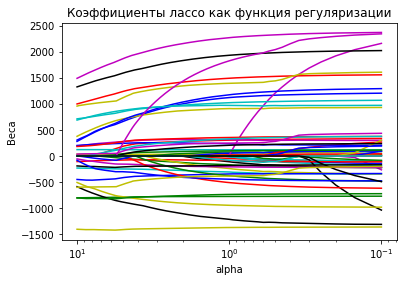

In [756]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel("alpha")
plt.ylabel("Веса")
plt.title("Коэффициенты лассо как функция регуляризации")
plt.axis("tight")
plt.show();

Лучшее alpha в процессе кросс-валидации


In [757]:
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=17)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17

In [758]:
print(f'Lasso coef: {lasso_cv.coef_}')
print(f'Lasso alpha: {lasso_cv.alpha_}')

Lasso coef: [ 1126.4678515    305.1792986   -774.84579287   118.66276728
     3.2943875     30.46159224    -0.           -22.24625654
   -51.27746182    74.33757385   -19.92844573     0.
    11.01556465    -0.            56.11682066     0.
  -173.42654883   -20.00215161    -0.           907.60009722
   312.15120393   230.69817971    18.72436938     0.
  -311.65001746  -119.2413715      0.           143.46517839
     0.           -90.70126368     0.           969.22847665
 -1223.21782956  -249.22400126     0.          1181.60072085
  1495.10623254   100.54455126    -0.           208.72148443
  -946.12347339  -208.58085447  -342.59531324  -515.98717988
  -384.49109046  1024.30200882  -179.89710629 -1369.19915319
  2274.8571276   -447.55984156   358.13812298  -734.50024042
   331.78000636  1936.89751125  1396.61720033  1845.23857427
     0.            -0.            -0.           -86.66303676
    -0.          -381.1243663    249.32543532]
Lasso alpha: 0.9457286432160804


In [759]:
cross_val_score(Lasso(lasso_cv.alpha_), X_train, y_train, cv=3, scoring="neg_mean_squared_error")

array([-3048099.27177966, -2952400.06403425, -2874461.74717438])

**Выведем модуль среднего значения метрики `neg_mean_squared_error` на кросс-валидации.**

In [760]:
abs(np.mean(cross_val_score(Lasso(lasso_cv.alpha_), X_train, y_train, cv=3, scoring="neg_mean_squared_error")))

2958320.3609960955

In [761]:
abs(np.mean(cross_val_score(Lasso(9.95), X_train, y_train, cv=3, scoring="neg_mean_squared_error")))

3034609.7609885945

In [762]:
lasso_cv.alphas[:10]  # значения параметров на входе

array([0.1       , 0.14974874, 0.19949749, 0.24924623, 0.29899497,
       0.34874372, 0.39849246, 0.44824121, 0.49798995, 0.54773869])

In [763]:
lasso_cv.alphas_[:10]  # преобразованные значения параметров

array([10.        ,  9.95025126,  9.90050251,  9.85075377,  9.80100503,
        9.75125628,  9.70150754,  9.65175879,  9.60201005,  9.55226131])

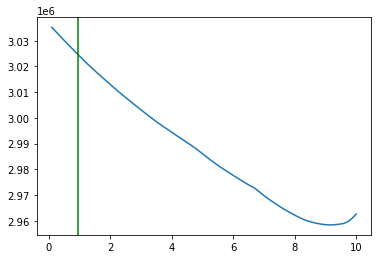

In [764]:
plt.plot(lasso_cv.alphas, lasso_cv.mse_path_.mean(1))  # неверно
plt.axvline(lasso_cv.alpha_, c="g");

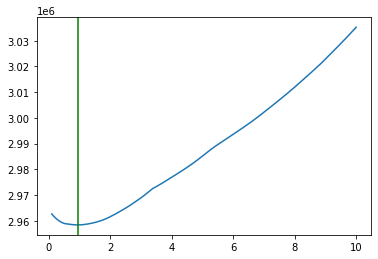

In [765]:
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(1))  # верно
plt.axvline(lasso_cv.alpha_, c="g");

In [766]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring="neg_mean_squared_error", cv=3)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [767]:
print(ridge_cv.alpha_)
print(ridge_cv.coef_)

5.941133984965034
[ 1.05879058e+03  3.22346858e+02 -7.80923481e+02  1.19076052e+02
  3.39737376e+00  3.07667448e+01 -1.19925572e+02 -1.75665534e+02
 -1.21170578e+02  5.76567259e+01 -1.91372578e+02  5.30925054e+01
  5.87168293e+01 -3.54030273e+01  6.66287503e+01  1.69911607e+02
 -2.46589078e+02 -1.16161239e+02 -2.22471045e+02  8.55647522e+02
  2.69392695e+02  1.85953857e+02  2.15869016e+01 -8.74854819e-01
 -3.69409208e+02 -2.08991489e+02  1.05987673e+02  5.98025395e+02
  6.49526128e+01 -1.46623741e+02  3.04926389e+01  9.16919143e+02
 -1.20668945e+03 -2.72973649e+02 -2.06438095e+01  9.43868803e+02
  1.28028493e+03 -7.23346495e+01 -1.85380585e+02  3.20609329e+01
 -1.11689914e+03 -4.04025212e+02 -5.42208628e+02 -7.07774685e+02
 -5.85123078e+02  8.31780119e+02 -3.74900143e+02 -1.55279366e+03
  1.99310209e+03 -6.42201729e+02  1.81828258e+02 -9.33197759e+02
  1.57858213e+02  1.69605592e+03  1.07418442e+03  1.30090404e+03
 -2.89704981e+02 -2.16619595e+02 -4.10037726e+02 -4.25594944e+02
 -2.968

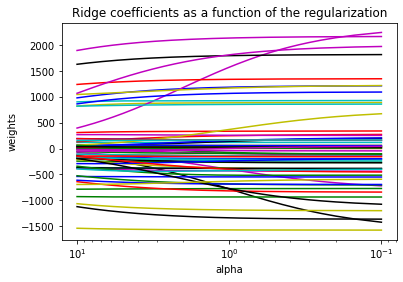

In [768]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
model = Ridge()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()